In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Source where my data is stored and saved

df = pd.read_csv(''r'C:\Users\Ryan\Desktop\Ryan\School\MS_DataScience\DSC680_Applied_Data_Science\Project_5_UFC_Fighters\data.csv')

In [60]:
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [77]:
df_fighter = df.loc[0:6012, ['R_fighter', 'B_fighter', 'Winner']]
df_fighter

,R_fighter,B_fighter,Winner
0,Adrian Yanez,Gustavo Lopez,Red
1,Trevin Giles,Roman Dolidze,Red
2,Tai Tuivasa,Harry Hunsucker,Red
3,Cheyanne Buys,Montserrat Conejo,Blue
4,Marion Reneau,Macy Chiasson,Blue
...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red
6008,Orlando Wiet,Robert Lucarelli,Red
6009,Johnny Rhodes,David Levicki,Red
6010,Patrick Smith,Ray Wizard,Red


In [78]:
df_fighter.describe()

,R_fighter,B_fighter,Winner
count,6012,6012,6012
unique,1514,1987,3
top,Jim Miller,Jeremy Stephens,Red
freq,27,21,3979


In [79]:
df_fighter['Winner'].value_counts()

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64

In [80]:
r_fight = df_fighter['R_fighter'].value_counts()
b_fight = df_fighter['B_fighter'].value_counts()

print('Wins by right handed fighters: \n'+str(r_fight))
print('Wins by left handded fighters: \n'+str(b_fight))

Wins by right handed fighters: 
Jim Miller               27
Andrei Arlovski          24
Diego Sanchez            24
Donald Cerrone           24
Demian Maia              24
                         ..
Anthony Christodoulou     1
Poliana Botelho           1
Oliver Enkamp             1
Jutaro Nakao              1
Hernani Perpetuo          1
Name: R_fighter, Length: 1514, dtype: int64
Wins by left handded fighters: 
Jeremy Stephens       21
Charles Oliveira      19
Nik Lentz             15
Rafael Dos Anjos      14
Sam Alvey             13
                      ..
Richardson Moreira     1
Sean Alvarez           1
Matt Van Buren         1
Nate Schroeder         1
Hernani Perpetuo       1
Name: B_fighter, Length: 1987, dtype: int64


In [41]:
# Returns the number of missing values in each column
df.isnull().sum()

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64

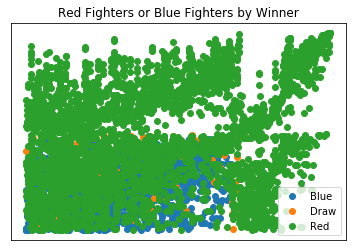

In [7]:
groups = df.groupby('Winner')
for name, group in groups:
    plt.plot(group['R_fighter'], group['B_fighter'], marker='o', linestyle="", label=name)
    plt.title('Red Fighters or Blue Fighters by Winner')
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.legend()

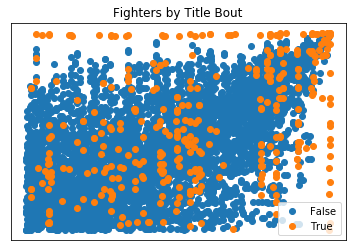

In [10]:
groups = df.groupby('title_bout')
for name, group in groups:
    plt.plot(group['R_fighter'], group['B_fighter'], marker='o', linestyle="", label=name)
    plt.title('Fighters by Title Bout')
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.legend()

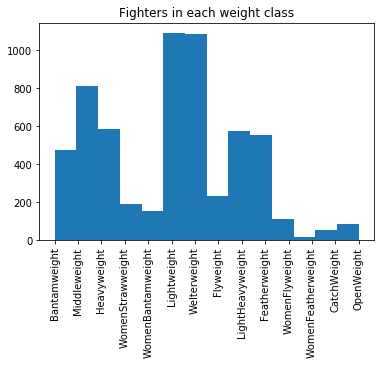

In [36]:
plt.hist(df['weight_class'], bins=14)
plt.xticks(rotation='vertical')
plt.title('Fighters in each weight class')
plt.show()

In [46]:
df1 = pd.read_csv(''r'C:\Users\Ryan\Desktop\Ryan\School\MS_DataScience\DSC680_Applied_Data_Science\Project_5_UFC_Fighters\preprocessed_data.csv')

In [47]:
df1.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(106), int64(52), object(1)
memory usage: 7.1+ MB


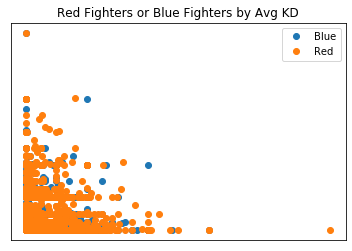

In [49]:
groups = df1.groupby('Winner')
for name, group in groups:
    plt.plot(group['B_avg_KD'], group['B_avg_opp_KD'], marker='o', linestyle="", label=name)
    plt.title('Red Fighters or Blue Fighters by Avg KD')
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.legend()